In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
df = pd.read_csv('C:/Users/alekh/Desktop/isds 552/LifeExpectancy.csv',encoding='latin-1')

In [57]:
df.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [58]:
df.shape

(260, 218)

In [59]:
df.tail()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10
257,Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,46.4,47.3,48.0,49.1,51.6,54.2,55.7,57.0,59.3,61.69
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,South Sudan,26.67,26.67,26.67,26.67,26.67,26.67,26.67,26.67,26.67,...,55.5,55.6,55.8,56.0,55.9,56.0,56.0,56.1,56.1,56.10


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 218 entries, Life expectancy to 2016
dtypes: float64(217), object(1)
memory usage: 442.9+ KB


In [61]:
df.rename(columns={'Life expectancy':'Country'}, inplace=True)

In [62]:
for i in range(len(df.index)) :
    print("Nan in row ", i , " : " ,  df.iloc[i].isnull().sum())

Nan in row  0  :  217
Nan in row  1  :  0
Nan in row  2  :  217
Nan in row  3  :  0
Nan in row  4  :  0
Nan in row  5  :  190
Nan in row  6  :  190
Nan in row  7  :  0
Nan in row  8  :  217
Nan in row  9  :  0
Nan in row  10  :  0
Nan in row  11  :  0
Nan in row  12  :  0
Nan in row  13  :  0
Nan in row  14  :  0
Nan in row  15  :  0
Nan in row  16  :  0
Nan in row  17  :  0
Nan in row  18  :  0
Nan in row  19  :  0
Nan in row  20  :  0
Nan in row  21  :  0
Nan in row  22  :  0
Nan in row  23  :  0
Nan in row  24  :  190
Nan in row  25  :  0
Nan in row  26  :  0
Nan in row  27  :  0
Nan in row  28  :  0
Nan in row  29  :  0
Nan in row  30  :  217
Nan in row  31  :  0
Nan in row  32  :  0
Nan in row  33  :  0
Nan in row  34  :  0
Nan in row  35  :  0
Nan in row  36  :  0
Nan in row  37  :  0
Nan in row  38  :  0
Nan in row  39  :  217
Nan in row  40  :  0
Nan in row  41  :  0
Nan in row  42  :  150
Nan in row  43  :  0
Nan in row  44  :  0
Nan in row  45  :  217
Nan in row  46  :  217
N

In [63]:
df = df.dropna()

In [64]:
df_melt = pd.melt(df, id_vars='Country',var_name='Year',value_name='LifeExpectancy')

In [65]:
df_melt.head()

,Country,Year,LifeExpectancy
0,Afghanistan,1800,28.21
1,Albania,1800,35.40
2,Algeria,1800,28.82
3,Angola,1800,26.98
4,Antigua and Barbuda,1800,33.54


In [66]:
df_melt.dtypes

Country            object
Year               object
LifeExpectancy    float64
dtype: object

In [74]:
df_melt['Year'] = pd.to_numeric(df_melt['Year'],errors='coerce')
assert df_melt['Year'].dtypes == np.int64

In [78]:
#Looking at country spellings
# Create the series of countries: countries
countries = df_melt['Country']
# Drop all the duplicates from countries
countries = countries.drop_duplicates()
# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'
# Create the Boolean vector: mask
mask = countries.str.contains(pattern)
# Invert the mask: mask_inverse
mask_inverse = ~mask
# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]
# Print invalid_countries
print(invalid_countries)

38          Congo, Dem. Rep.
39               Congo, Rep.
41             Cote d'Ivoire
73             Guinea-Bissau
77          Hong Kong, China
105             Macao, China
106           Macedonia, FYR
118    Micronesia, Fed. Sts.
177              Timor-Leste
196    Virgin Islands (U.S.)
Name: Country, dtype: object


Year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: LifeExpectancy, dtype: float64
Year
2012    71.514577
2013    71.774776
2014    71.950050
2015    72.187861
2016    72.428507
Name: LifeExpectancy, dtype: float64


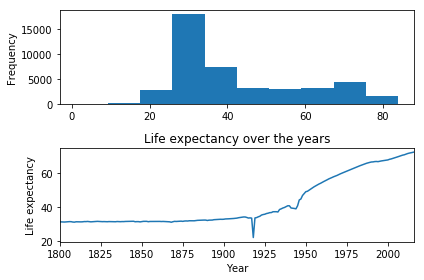

In [84]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
df_melt['LifeExpectancy'].plot(kind='hist')

# Group gapminder: gapminder_agg
df_agg = df_melt.groupby('Year')['LifeExpectancy'].mean()

# Print the head of gapminder_agg
print(df_agg.head())

# Print the tail of gapminder_agg
print(df_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
df_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

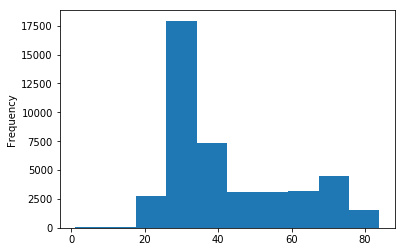

In [85]:
# Create a histogram of life_expectancy
df_melt['LifeExpectancy'].plot(kind='hist')

In [86]:
df_melt["Country"].unique()

0                   Afghanistan
1                       Albania
2                       Algeria
3                        Angola
4           Antigua and Barbuda
5                     Argentina
6                       Armenia
7                         Aruba
8                     Australia
9                       Austria
10                   Azerbaijan
11                      Bahamas
12                      Bahrain
13                   Bangladesh
14                     Barbados
15                      Belarus
16                      Belgium
17                       Belize
18                        Benin
19                       Bhutan
20                      Bolivia
21       Bosnia and Herzegovina
22                     Botswana
23                       Brazil
24                       Brunei
25                     Bulgaria
26                 Burkina Faso
27                      Burundi
28                     Cambodia
29                     Cameroon
                  ...          
43587   

In [88]:
df_melt.shape

(43617, 3)

In [90]:
df.shape

(201, 218)

In [91]:
continent = pd.read_csv('C:/Users/alekh/Desktop/countryContinent.csv')

In [92]:
df_merge = pd.merge(left=df_melt, right=continent, left_on='Country', right_on='Country Name')

In [99]:
df_merge['Continent'].isnull().sum()

0

In [100]:
df_merge['Continent'].value_counts(dropna = False) 

Africa      12369
Asia        11067
Americas     8680
Europe       8680
Oceania      2821
Name: Continent, dtype: int64

In [102]:
df_merge.head()

,Country,Year,LifeExpectancy,Country Name,Continent
0,Afghanistan,1800,28.21,Afghanistan,Asia
1,Afghanistan,1801,28.20,Afghanistan,Asia
2,Afghanistan,1802,28.19,Afghanistan,Asia
3,Afghanistan,1803,28.18,Afghanistan,Asia
4,Afghanistan,1804,28.17,Afghanistan,Asia


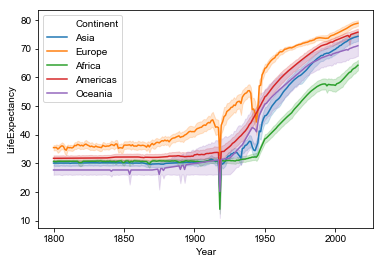

In [108]:
sns.lineplot(x="Year", y="LifeExpectancy",hue="Continent", data=df_merge)
sns.set()

In [116]:
def year_range(year):
    if year >= 1800 and year <= 1850:
        return "1800-1850"
    elif year > 1850 and year <= 1900:
        return "1851-1900"
    elif year >= 1900 and year <= 1950:
        return "1901-1950"
    elif year > 1950 and year <= 2000:
        return "1951-2000"
    else:
        return "2001-2014"

In [117]:
df_merge['YearRange'] = df_merge['Year'].apply(year_range)

In [135]:
df_merge['YearRange'].value_counts(dropna = False) 

1800-1850    10251
1951-2000    10050
1851-1900    10050
1901-1950    10050
2001-2014     3216
Name: YearRange, dtype: int64

In [119]:
df_merge.head()

,Country,Year,LifeExpectancy,Country Name,Continent,YearRange
0,Afghanistan,1800,28.21,Afghanistan,Asia,1800-1850
1,Afghanistan,1801,28.20,Afghanistan,Asia,1800-1850
2,Afghanistan,1802,28.19,Afghanistan,Asia,1800-1850
3,Afghanistan,1803,28.18,Afghanistan,Asia,1800-1850
4,Afghanistan,1804,28.17,Afghanistan,Asia,1800-1850


In [120]:
df_merge.tail()

,Country,Year,LifeExpectancy,Country Name,Continent,YearRange
43612,South Sudan,2012,56.0,South Sudan,Africa,2001-2014
43613,South Sudan,2013,56.0,South Sudan,Africa,2001-2014
43614,South Sudan,2014,56.1,South Sudan,Africa,2001-2014
43615,South Sudan,2015,56.1,South Sudan,Africa,2001-2014
43616,South Sudan,2016,56.1,South Sudan,Africa,2001-2014


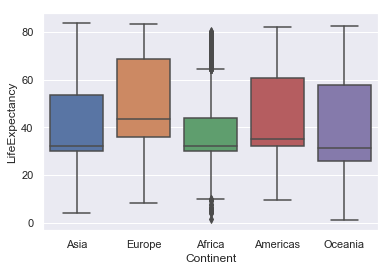

In [145]:
sns.boxplot(x=df_merge["Continent"],y=df_merge["LifeExpectancy"])

In [126]:
df_1800_1850 = df_merge[df_merge['YearRange'] == '1800-1850']
assert df_1800_1850['YearRange'].all() == '1800-1850'

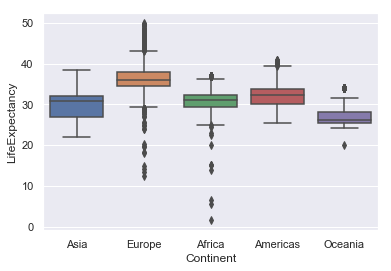

In [143]:
sns.boxplot(x=df_1800_1850["Continent"],y=df_1800_1850["LifeExpectancy"])

In [137]:
df_1851_1900 = df_merge[df_merge['YearRange'] == '1851-1900']
assert df_1851_1900['YearRange'].all() == '1851-1900'

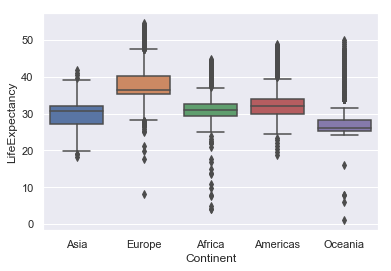

In [144]:
sns.boxplot(x=df_1851_1900["Continent"],y=df_1851_1900["LifeExpectancy"])

In [138]:
df_1901_1950 = df_merge[df_merge['YearRange'] == '1901-1950']
assert df_1901_1950['YearRange'].all() == '1901-1950'

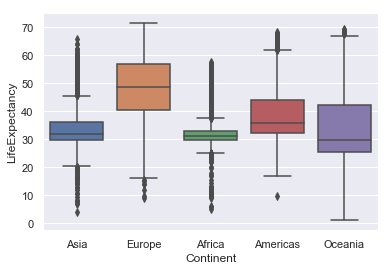

In [146]:
sns.boxplot(x=df_1901_1950["Continent"],y=df_1901_1950["LifeExpectancy"])

In [139]:
df_1951_2000 = df_merge[df_merge['YearRange'] == '1951-2000']
assert df_1951_2000['YearRange'].all() == '1951-2000'

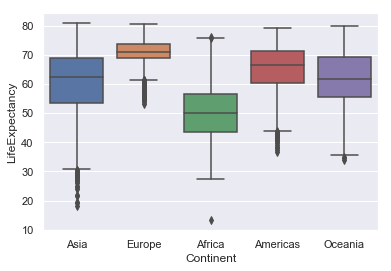

In [147]:
sns.boxplot(x=df_1951_2000["Continent"],y=df_1951_2000["LifeExpectancy"])

In [141]:
df_2001_2014 = df_merge[df_merge['YearRange'] == '2001-2014']
assert df_2001_2014['YearRange'].all() == '2001-2014'

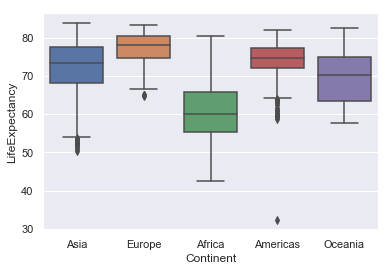

In [148]:
sns.boxplot(x=df_2001_2014["Continent"],y=df_2001_2014["LifeExpectancy"])